In [1]:
library(tidyverse)

event <- read_csv("Data/events2.csv")
event_grouped <- read_csv("Data/event.csv")

host <- read_csv("Data/host.csv")
lawmaker <- read_csv("Data/lawmaker.csv")
venue <- read_csv("Data/venue.csv")

candContribution <- read_csv("Data/candContrib.csv")
candIndustry <- read_csv("Data/candIndustry.csv")
candSector <- read_csv("Data/candSector.csv")

merged_candidates <- read_csv("Data/merged_candidates.csv")
merged_lawmakers <- read_csv("Data/merged_lawmakers.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
Warning message:
“package ‘tidyr’ was built under R version 3.4.2”Warning message:
“package ‘purrr’ was built under R version 3.4.2”Warning message:
“package ‘dplyr’ was built under R version 3.4.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  beneficiaries_id = col_integer(),
  end_date = col_date(format = ""),
  end_time = col_time(format = ""),
  hosts_id = col_integer(),
  id = col_integer(),
  start_date = col_date(format = ""),
  start_time = col_time(format = ""),
  venue_id = col_double()
)
See sp

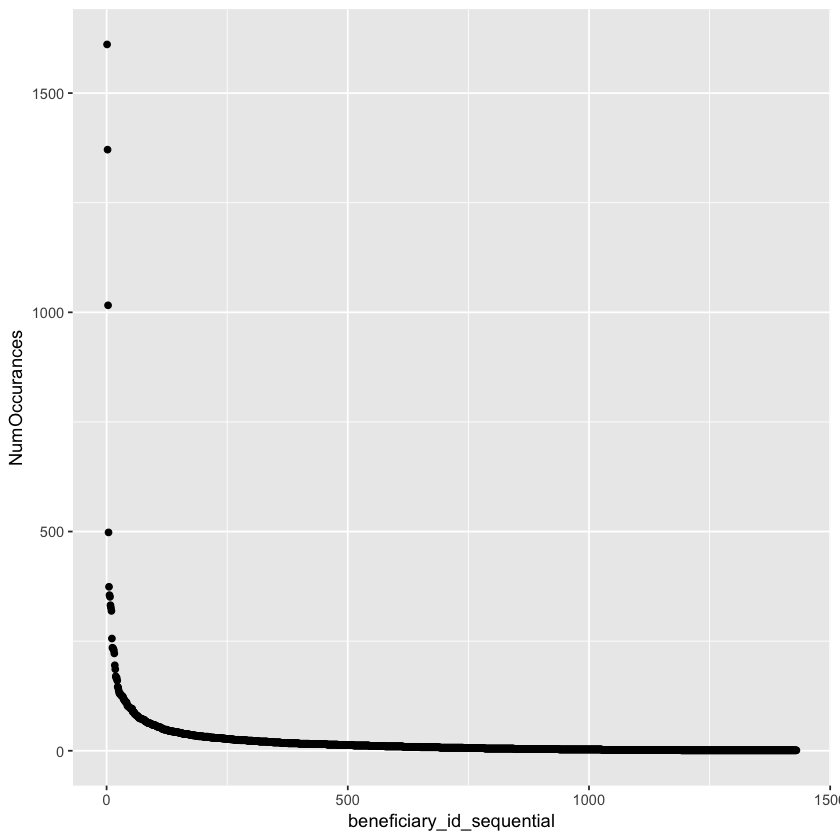

In [14]:
# Plot lawmaker appeances counts
event %>%
  group_by(beneficiaries_id) %>%
  summarize(
    NumOccurances = n()
  ) %>%
  arrange(desc(NumOccurances)) %>%
  rowid_to_column("beneficiary_id_sequential") %>%
  ggplot(aes(x = beneficiary_id_sequential, y = NumOccurances)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


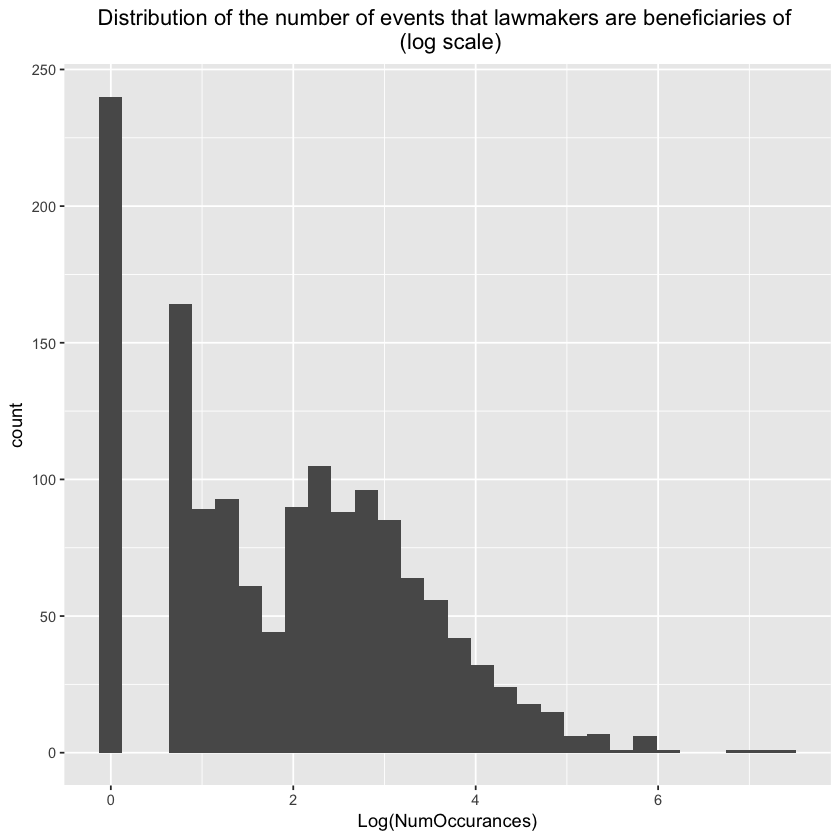

In [11]:
# Plot lawmaker appeances counts
event %>% 
    group_by(beneficiaries_id) %>%
    summarize(
        NumOccurances = n()
    ) %>%
    ggplot(aes(x = log(NumOccurances))) + geom_histogram() +
    labs(x = "Log(NumOccurances)", 
         title = "Distribution of the number of events that lawmakers are beneficiaries of \n (log scale)") +
    theme(plot.title = element_text(hjust = 0.5))

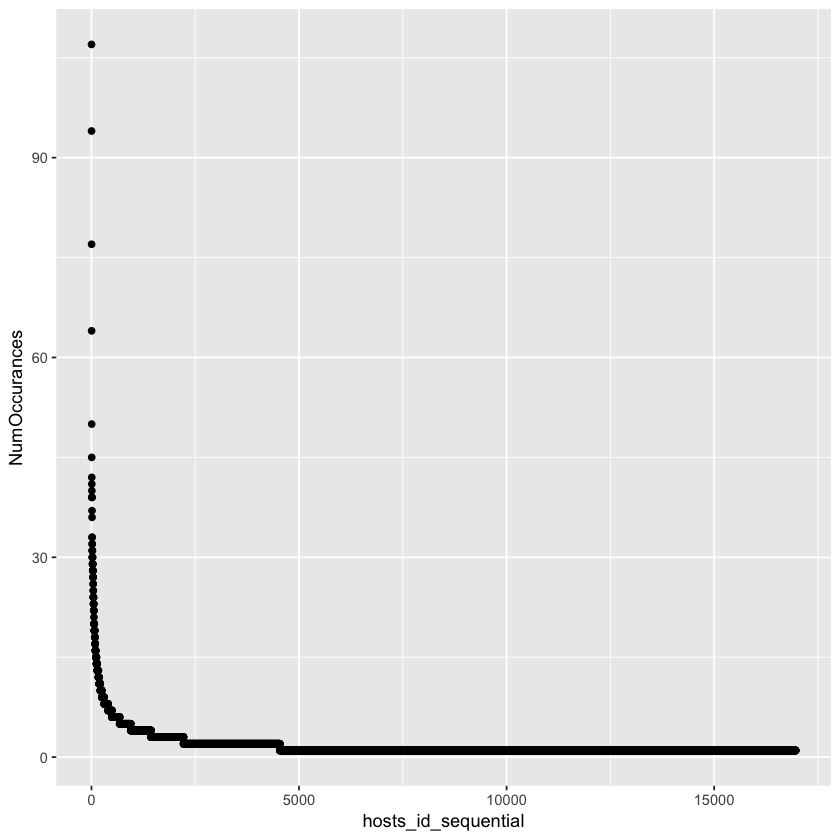

In [15]:
# Plot host appeances counts
event %>%
  group_by(hosts_id) %>%
  summarize(
    NumOccurances = n()
  ) %>%
  arrange(desc(NumOccurances)) %>%
  rowid_to_column("hosts_id_sequential") %>%
  ggplot(aes(x = hosts_id_sequential, y = NumOccurances)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


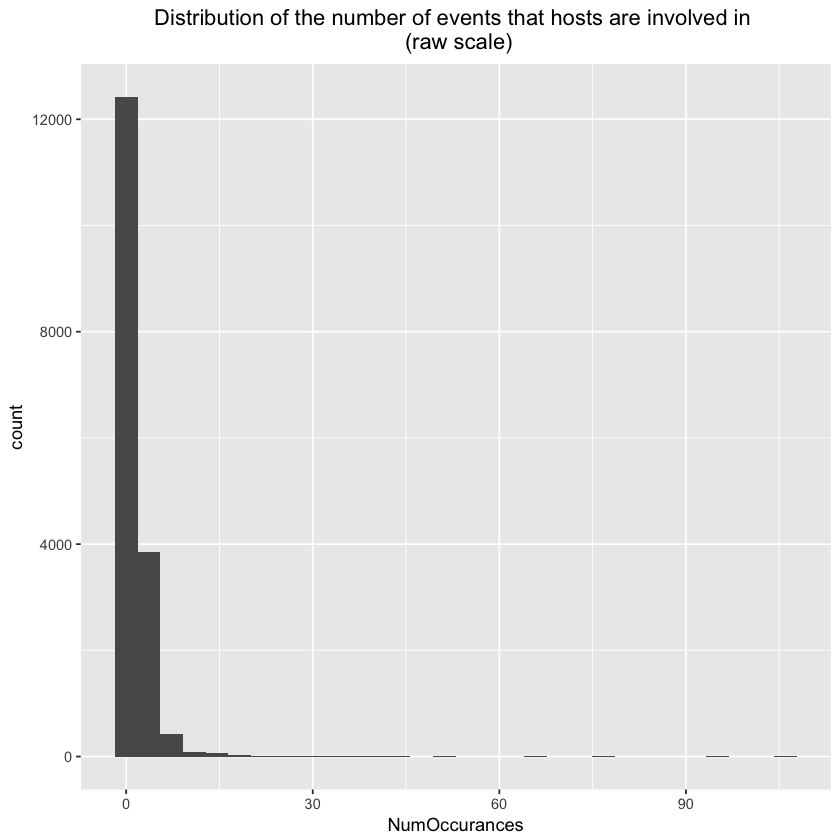

In [15]:
# Plot host appeances counts
event %>% 
    group_by(hosts_id) %>%
    summarize(
        NumOccurances = n()
    ) %>%
    ggplot(aes(x = (NumOccurances))) + geom_histogram() +
    labs(x = "NumOccurances", 
         title = "Distribution of the number of events that hosts are involved in \n (raw scale)") +
    theme(plot.title = element_text(hjust = 0.5))

In [33]:
# This implementation is too inefficient

# host_ids <- unique(event$hosts_id)
# num_hosts <- length(host_ids)

# H_mat = matrix(data = NA, nrow = num_hosts, ncol = num_hosts)
# for(i in seq(num_hosts)){
#   for(j in seq(num_hosts)){
#     h_i <- host_ids[i]
#     h_j <- host_ids[j]

#     events_ij <- event_grouped %>%
#       dplyr::filter(h_i %in% hosts_id & h_j %in% hosts_id)
#     H_mat[i,j] <- nrow(events_ij)
#   }
# }

In [ ]:
event_data <- event %>%
  mutate(
    event_id = X1
  ) %>%
  select(
    hosts_id,
    event_id
  )

event_data %>%
  unnest(hosts_id) %>%
  mutate_all(funs(as.factor)) %>%
  xtabs(~ event_id + hosts_id, data = .) ->
  event_matrix

H_mat = crossprod(event_matrix)
